In [12]:
import os
import PyPDF2
import matplotlib.pyplot as plt
import statistics
import seaborn as sns
import pandas as pd
base = r'F:\\Data files\\Master thesis\\PDFS\\'

In [13]:
unique = set([item.split('_')[0] for item in os.listdir(base)])

len(unique), len(os.listdir(base))

(119, 368)

In [14]:
def countUnique(text, unique):
    text = text.replace('\n', ' ')
    words = text.split(' ')
    
    for word in words:
        if word in unique:
            pass
        else:
            unique[word] = 0
    return unique
    

files = {}
oserror = []
readerror = []

for item in os.listdir(base):

    if os.path.isdir(base + item):
        continue
    files[item] = {}
    files[item]['unique'] = 0
    files[item]['pages'] = 0 
    files[item]['chars'] = 0
    files[item]['words'] = 0
    
    try:
        with open(base + item, 'rb') as f:
            reader = PyPDF2.PdfFileReader(f)
            
            uniqueWords = {}
            for page in reader.pages:
                text = page.extractText()
                text = text.replace('\n', ' ')
                files[item]['pages'] += 1
                files[item]['chars'] += len(text)
                files[item]['words'] += len(text.split())
                uniqueWords = countUnique(text, uniqueWords)
            files[item]['unique'] = len(uniqueWords)
            
                

    except OSError:
        oserror.append(item)
        continue
    except:
        readerror.append(item)

    
    
# checks if the files in inventaris lijst folder all bestaan
# print(len(files))
# for item in os.listdir(base + 'Inventarislijsten'):
#     files.append(item)
    
# print(len(files))
# files = set(files)

print(len(files))

print(sum([files[x]['unique'] for x in files]) / len(files) / 1024**2)

367
0.0007937766550672152


In [15]:
empty = 0
totalwords = 0
totalpages = 0

for f in files:
    if files[f]['words'] == 0:
        empty += 1
        continue
    
    totalwords += files[f]['words']
    totalpages += files[f]['pages']

print(f'Empty files {empty}')
print(f'Words per page {totalwords/totalpages}')
print(f'Words per file {totalwords/(len(files) - empty)}')
print(f'words: {totalwords}, pages: {totalpages}')
print(len(files) - empty, totalpages)

Empty files 135
Words per page 64.06223589466211
Words per file 8168.211206896552
words: 1895025, pages: 29581
232 29581


(array([324.,  17.,   6.,   8.,   4.,   2.,   3.,   0.,   1.,   2.]),
 array([    0. ,  1630.8,  3261.6,  4892.4,  6523.2,  8154. ,  9784.8,
        11415.6, 13046.4, 14677.2, 16308. ]),
 <BarContainer object of 10 artists>)

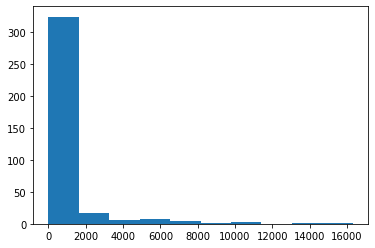

In [16]:
unique = [files[x]['unique'] for x in files]
plt.hist(unique)

<AxesSubplot:>

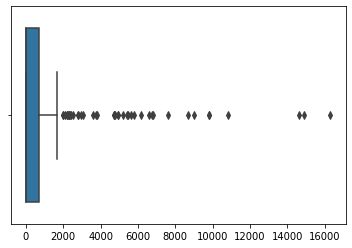

In [17]:
sns.boxplot(unique)

In [18]:
data = {
    'file' : files.keys(),
    'unique words' : [files[x]['unique'] for x in files],
    'pages' : [files[x]['pages'] for x in files],
    'words' : [files[x]['words'] for x in files],
    'chars' : [files[x]['chars'] for x in files]
}

df = pd.DataFrame.from_dict(data)
print(df.shape)

dfClean = df
dfClean

(367, 5)


,file,unique words,pages,words,chars
0,0068ed0b40cca6270f857d2614cc63c0_besluit.pdf,658,3,3144,9746
1,0068ed0b40cca6270f857d2614cc63c0_document.pdf,159,1,526,1880
2,0272cdb141e62321341591f0959794a2_derde-deelbes...,191,11,320,3088
3,0272cdb141e62321341591f0959794a2_inventarislij...,699,3,2240,17242
4,0272cdb141e62321341591f0959794a2_wob-documente...,8,1449,1932,5806
...,...,...,...,...,...
362,fc406f9a1e19428a996ca187ab93b4a2_deels-openbar...,16308,767,106530,545506
363,fc406f9a1e19428a996ca187ab93b4a2_inventarislij...,2289,6,14096,69907
364,ff9481e357a59c506fc16db2aab2411a_besluit.pdf,967,5,2932,13513
365,ff9481e357a59c506fc16db2aab2411a_documenten.pdf,5,72,187,561


Text(0.5, 1.0, 'Number of words')

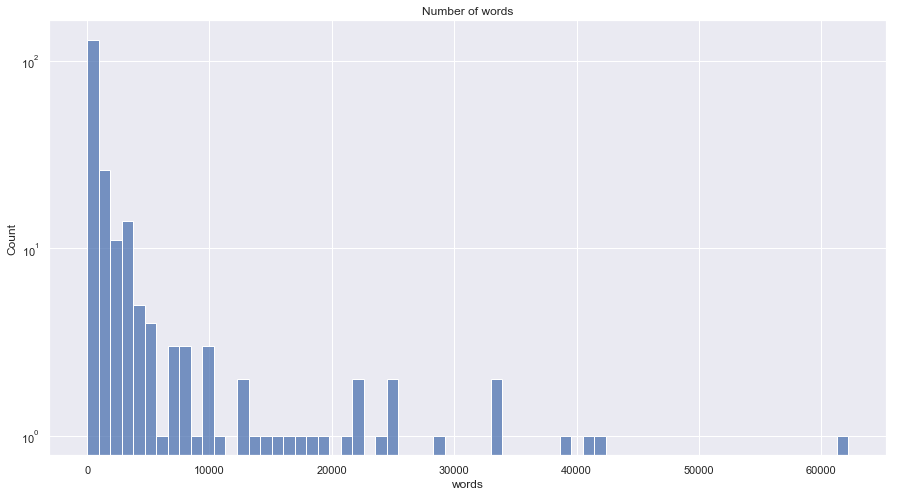

In [38]:
sns.histplot(dfClean['words'], log_scale=(False, True)).set_title('Number of words')

Text(0.5, 1.0, 'Number of unique words')

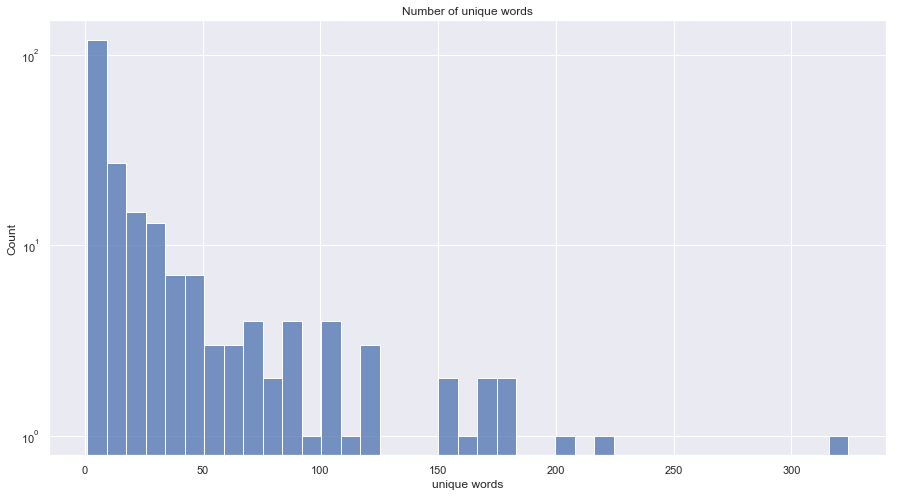

In [39]:
sns.histplot(dfClean['unique words'], log_scale=(False, True)).set_title('Number of unique words')

Text(0.5, 1.0, 'Number of pages')

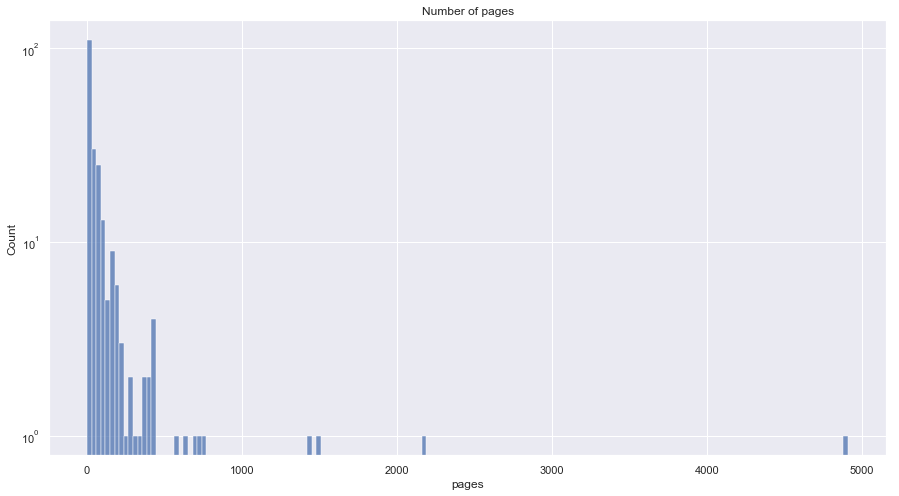

In [40]:
sns.histplot(dfClean['pages'], log_scale=(False, True)).set_title('Number of pages')

Text(0.5, 1.0, 'Number of characters')

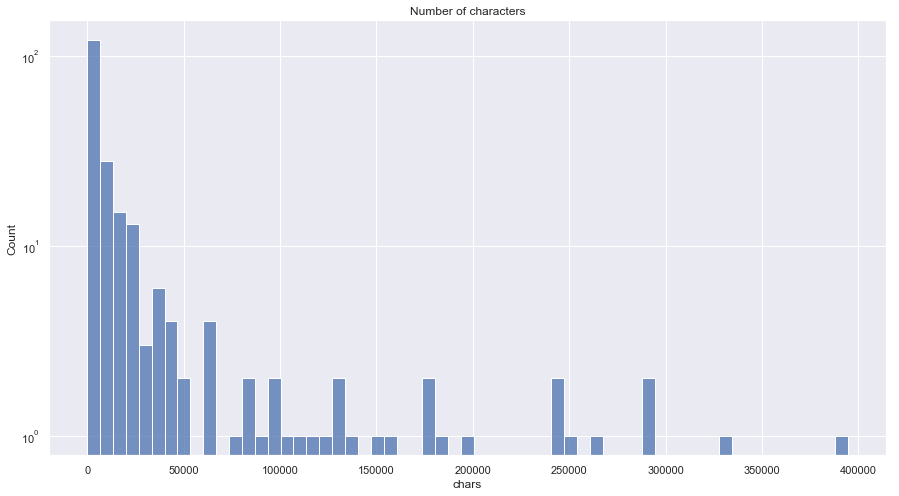

In [41]:
sns.histplot(dfClean['chars'], log_scale=(False, True)).set_title('Number of characters')

In [19]:
dfClean.describe()

,unique words,pages,words,chars
count,367.000000,367.000000,367.000000,367.000000
mean,832.335150,88.762943,5163.555858,24962.005450
std,2103.705731,320.733280,16377.130181,71322.847153
min,0.000000,0.000000,0.000000,0.000000
25%,1.000000,3.000000,0.000000,0.000000
50%,12.000000,12.000000,144.000000,989.000000
75%,687.000000,72.000000,2577.500000,13769.000000
max,16308.000000,4910.000000,133333.000000,545506.000000


In [18]:
nowords = ['_' for x in files if files[x]['words'] == 0]
nochars = ['_' for x in files if files[x]['chars'] == 0]

len(nowords) / len(files) * 100, len(nowords),len(nochars) / len(files) * 100, len(nochars)

(39.23705722070845, 144, 26.975476839237057, 99)

In [11]:
df = pd.read_csv('..\\data\\ocred\\files_df.csv', index_col = 0)
df.head()

,full_name,name,page,text
0,0068ed0b40cca6270f857d2614cc63c0_besluit-1.txt,0068ed0b40cca6270f857d2614cc63c0_besluit,1,Ministerie van Financiën\n\n \n\n> Retouradres...
1,0068ed0b40cca6270f857d2614cc63c0_besluit-2.txt,0068ed0b40cca6270f857d2614cc63c0_besluit,2,Wettelijk kader\n\nUw verzoek om informatie is...
2,0068ed0b40cca6270f857d2614cc63c0_besluit-3.txt,0068ed0b40cca6270f857d2614cc63c0_besluit,3,BIJLAGE A\nĳ ĳ Directie Juridische Zaken\nArti...
3,0068ed0b40cca6270f857d2614cc63c0_document-1.txt,0068ed0b40cca6270f857d2614cc63c0_document,1,BIJLAGE B\n\nOverzicht agenda-afspraken Minist...
4,0272cdb141e62321341591f0959794a2_derde-deelbes...,0272cdb141e62321341591f0959794a2_derde-deelbes...,1,\n\n> Retouradres Postbus 20301 2500 EH Den H...


In [12]:
docsUnique = df.name.unique()
docs = {}
for doc in docsUnique:
    
    pages = list(df[df.name == doc].text.values)
    pages = [str(page) for page in pages]
    text = ' '.join(pages)
    
    text = text.replace('\n', ' ')
    
    docs[doc] = {}
    docs[doc]['pages'] = len(pages) 
    docs[doc]['chars'] = len(text)
    docs[doc]['words'] = len(text.split(' '))
    docs[doc]['unique'] = len(set(text.split(' ')))


In [13]:
data = {
    'file' : docs.keys(),
    'pages' : [docs[x]['pages'] for x in docs],
    'words' : [docs[x]['words'] for x in docs],
    'chars' : [docs[x]['chars'] for x in docs],
    'unique words' : [docs[x]['unique'] for x in docs]
}

df2 = pd.DataFrame.from_dict(data)
df2.head()

,file,pages,words,chars,unique words
0,0068ed0b40cca6270f857d2614cc63c0_besluit,3,1172,7364,506
1,0068ed0b40cca6270f857d2614cc63c0_document,1,328,1498,89
2,0272cdb141e62321341591f0959794a2_derde-deelbes...,11,4909,31152,1264
3,0272cdb141e62321341591f0959794a2_inventarislijst,3,3171,17022,812
4,306d4b337a5d407eb00c8845884c82fd_rivm-maart-20...,4910,1200227,7213469,82415


In [14]:
df2.describe().apply(lambda s: s.apply('{0:.5f}'.format))

,pages,words,chars,unique words
count,367.00000,367.00000,367.00000,367.00000
mean,94.55586,26355.09537,153460.92098,3843.98093
std,320.65422,88428.24206,528658.20895,6793.86314
min,1.00000,131.00000,615.00000,53.00000
25%,5.00000,2075.00000,12933.00000,701.00000
50%,17.00000,5758.00000,33914.00000,1522.00000
75%,80.00000,21753.50000,117794.00000,4896.50000
max,4910.00000,1200227.00000,7213469.00000,82415.00000


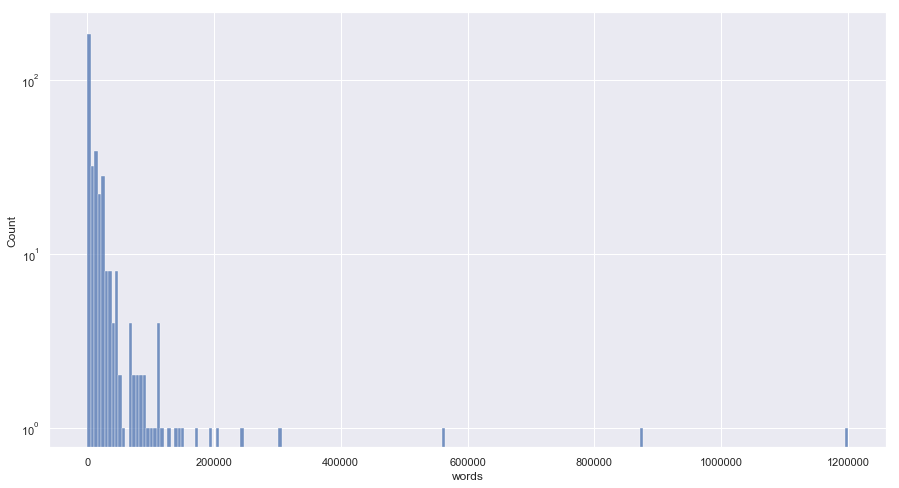

In [26]:
sns.set(rc = {'figure.figsize':(15,8)})

sns.histplot(df2['words'], log_scale=(False, True))

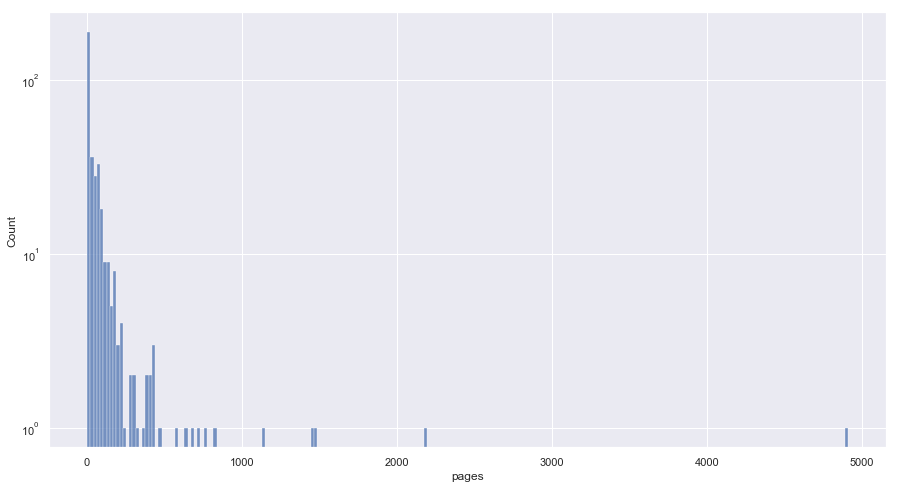

In [27]:
sns.histplot(df2['pages'], log_scale=(False, True))

In [11]:
path = r'F:\Data files\Master thesis\verzoeken\\'
requests = 0
files = 0

for dir in os.listdir(path):
    for request in os.listdir(path + dir):
        if request == '.DS_Store':
            continue
        requests += 1
        files += len(os.listdir(path+dir+'\\'+request))

requests, files

(1045, 3008)